In [207]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import pickle

In [208]:
data = pd.read_csv('Cleaned_Stock_Data.csv')

In [209]:
data.shape

(591730, 8)

In [210]:
data.head()

,Unnamed: 0,date,open,high,low,close,volume,Name
0,0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [211]:
data.isna().sum()

Unnamed: 0    0
date          0
open          0
high          0
low           0
close         0
volume        0
Name          0
dtype: int64

In [212]:
data.drop('Unnamed: 0',axis=1 ,inplace= True)

In [213]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [240]:
apple_data = data[data['Name']=='AAPL']

In [241]:
apple_data.shape

(1259, 7)

In [242]:
apple_data.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [243]:
apple_data.drop(['date', 'Name'],axis=1,inplace=True)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:xlabel='open', ylabel='Count'>

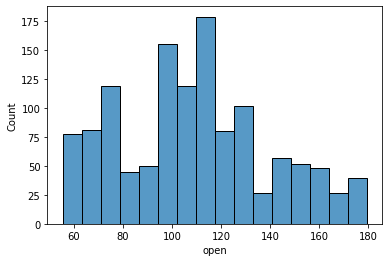

In [244]:
sns.histplot(apple_data['open'])

<AxesSubplot:xlabel='high', ylabel='Count'>

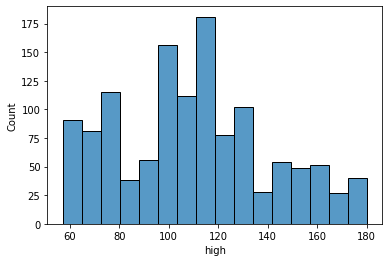

In [245]:
sns.histplot(apple_data['high'])

<AxesSubplot:xlabel='low', ylabel='Count'>

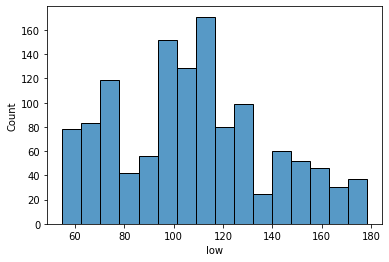

In [246]:
sns.histplot(apple_data['low'])

<AxesSubplot:xlabel='close', ylabel='Count'>

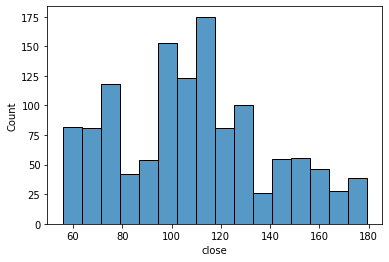

In [247]:
sns.histplot(apple_data['close'])

In [248]:
x = apple_data[['open', 'high', 'low','volume']]
y = apple_data['close']

In [249]:
x[:5]

,open,high,low,volume
1259,67.7142,68.4014,66.8928,158168416
1260,68.0714,69.2771,67.6071,129029425
1261,68.5014,68.9114,66.8205,151829363
1262,66.7442,67.6628,66.1742,118721995
1263,66.3599,67.3771,66.2885,88809154


In [250]:
y[:5]

1259    67.8542
1260    68.5614
1261    66.8428
1262    66.7156
1263    66.6556
Name: close, dtype: float64

## Linear Regression using Standard Scaler

In [251]:
Xscaler  = StandardScaler()
x_scaled = Xscaler.fit_transform(x)

In [252]:
x_scaled[:5]

array([[-1.35380402, -1.35455833, -1.35846973,  3.11225026],
       [-1.34210677, -1.32600971, -1.33494528,  2.24126118],
       [-1.32802553, -1.33793186, -1.36085083,  2.92277061],
       [-1.38556868, -1.37863735, -1.38213579,  1.93316339],
       [-1.39815338, -1.38795143, -1.37837148,  1.03904328]])

In [253]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.4)

In [254]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(755, 4)
(504, 4)
(755,)
(504,)


In [263]:
model = LinearRegression()

In [259]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Cross Validation

In [266]:
scores = cross_val_score(model, x_scaled, y, scoring='r2', cv=10)
scores= scores
print('r2 Score: ',np.mean(scores))

r2 Score:  0.9908207211118223


##   

## Support Vector Machines Regression

In [ ]:
Xscaler  = MinMaxScaler()
x_scaled = Xscaler.fit_transform(x)

In [188]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.4)

In [ ]:
model = LinearRegression()

In [265]:
scores = cross_val_score(model, x_scaled, y, scoring='r2', cv=10)
scores= scores
print('mean squared error: ',np.mean(scores))

mean squared error:  0.9908207211118223
